<a href="https://colab.research.google.com/github/dnjswlcks67/pdm12/blob/main/chap07_MLP_Keras_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP: Keras

## mini-batch 구현 

In [ ]:
import numpy as np
import tensorflow as tf

# 데이터를 학습 데이터와 테스트 데이터로 나눈다. 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #minst 데이터를 가져옴 

print(x_train.shape) # train 데이터는 28x28 영상이 60000개 있음. 3차원 행렬 
print(y_train.shape) # y_train 데이터는 (60000,)
print(y_train[:10]) # 5,0,4,1,.... 숫자 그림의 1번째 ~10번째 까지 정답이 출력 
#x_train.shape[0] = 60000  | [1] = 28 

print(x_test.shape , y_test.shape) #10000개 의 28x28 영상 |   
print(y_test[:10]) # 7,2,1,0... 
#x_test.shape[0] = 10000 

data_size = x_train.shape[0] # 60000
batch_size = 12	# 배치 크기

selected = np.random.choice(data_size, batch_size) #60000개 데이터 중 12개 정수 선택. 
#random seed 를 고정하지 않다면 랜덤으로 12개 값이 선별됌. 
print(selected)
x_batch = x_train[selected]
y_batch = y_train[selected]
x_batch.shape, y_batch.shape #28x28 영상 12개 | 12 개 숫자 


(60000, 28, 28)
(60000,)
[5 0 4 1 9 2 1 3 1 4]
(10000, 28, 28) (10000,)
[7 2 1 0 4 1 4 9 5 9]
[54637 42176 53091  8111 45464 12195 43671  5709 35588  2598  1502 55011]


((12, 28, 28), (12,))

## mini-batch: XOR using MLP 

In [ ]:
import numpy as np
# XOR solution by MLP

# 시그모이드 함수
def actf(x):
	return 1/(1+np.exp(-x))

# 시그모이드 함수의 미분치
def actf_deriv(x):
	    return x*(1-x)

# 입력유닛의 개수, 은닉유닛의 개수, 출력유닛의 개수
inputs, hiddens, outputs = 2, 2, 1
learning_rate = 0.5

# 훈련 입력과 출력
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0], [1], [1], [0]]) #XOR

# 가중치를 –1.0에서 1.0 사이의 난수로 초기화한다.
W1 = 2*np.random.random((inputs, hiddens))-1 #input = 2 hidden = 2 | w1 = -1~1 실수로 무작위로 만듬 
W2 = 2*np.random.random((hiddens, outputs))-1  #w2 = 2x2 으로 -1~1 까지 만들어줌. 
B1 = np.zeros(hiddens)   #2x1
B2 = np.zeros(outputs)   #1x1

# 순방향 전파 계산
def predict(x):
        layer0 = x			# 입력을 layer0에 대입한다. 
        Z1 = np.dot(layer0, W1)+B1	# 행렬의 곱을 계산한다. 
        layer1 = actf(Z1)		# 활성화 함수를 적용한다. 
        Z2 = np.dot(layer1, W2)+B2	# 행렬의 곱을 계산한다. 
        layer2 = actf(Z2)		# 활성화 함수를 적용한다. 
        return layer0, layer1, layer2
    
# 역방향 전파 계산
def fit():
    global W1, W2, B1, B2
    for i in range(60000):
            layer0, layer1, layer2 = predict(X) # input-batch-size = 4
            layer2_error = layer2-T

            layer2_delta = layer2_error*actf_deriv(layer2)
            layer1_error = np.dot(layer2_delta, W2.T)
            layer1_delta = layer1_error*actf_deriv(layer1)
            
            W2 += -learning_rate*np.dot(layer1.T, layer2_delta)/4.0 # 4개의 입력에 대한 평균 기울기
            W1 += -learning_rate*np.dot(layer0.T, layer1_delta)/4.0
            B2 += -learning_rate*np.sum(layer2_delta, axis=0)/4.0
            B1 += -learning_rate*np.sum(layer1_delta, axis=0)/4.0

def test(): # fit 로 가중치를 훈련 한 후 검증하는 단계  - global w1 w2 b1 b2 의 9개의 가중치를 6만번 훈련한 가중치로. 
    for x, y in zip(X, T):
        x = np.reshape(x, (1, -1))		# 하나여도 2차원 형태이어야 한다.
        layer0, layer1, layer2 = predict(x)
        print(x, y, layer2)

fit()
test()
W1,W2
B1,B2


[[0 0]] [0] [[0.01509707]]
[[0 1]] [1] [[0.98704073]]
[[1 0]] [1] [[0.98705231]]
[[1 1]] [0] [[0.01335476]]


(array([-2.95190401, -7.30943153]), array([-4.66921624]))

# Tensorflow-Keras
---

## MLP XOR in Keras
- 1-은닉층
- 2-은닉층 

In [1]:
import numpy as np

import tensorflow as tf

 

model = tf.keras.models.Sequential() #tensorflow 에는 kera가 내장, keras 에는 모델 이있고 그중 Sequential 라는 객체 생성자가 있다. 

 

 

model.add(tf.keras.layers.Dense(units=2, input_shape=(2,), activation='sigmoid')) # Dense = 뉴런 구조 hidden 레이어 

model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) # Output Layer 	

model.compile(loss='mean_squared_error',  #어떻게 학습시킬건지 

              optimizer=tf.keras.optimizers.SGD(lr=0.3))  # optimizer = 최적화  함수  

 

model.summary() # #hideen 레이어 = 2개의 신경세포가 있고 파라미터 갯수 = 6개(w1,w2, b1,b2 ....)

  

X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]]) #input 2차원 벡터

y = np.array([[0], [1], [1], [0]]) #정답 


model.fit(X, y, batch_size=1, epochs=10000,verbose=2) #batch_size = 1 : 위 input 2차원 벡터를 각각 1개씩 집어넣는다는 것 , 총 10000번 학습 

#학습 완료 = 초기 파라미터가 무작위 값으로 정해지고 학습(경사하강법)을 통해 손실이 최소가 되는 가중치값을 가지게 되는 모델이 완성된다. 

print(model.predict(X)) #학습된 모델에 input data를 넣어 예측

# [[0.0156148 ]

#  [0.98538893]

#  [0.9820687 ]

#  [0.01398213]]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 7503/10000
4/4 - 0s - loss: 3.2724e-04 - 14ms/epoch - 4ms/step
Epoch 7504/10000
4/4 - 0s - loss: 3.2719e-04 - 13ms/epoch - 3ms/step
Epoch 7505/10000
4/4 - 0s - loss: 3.2714e-04 - 13ms/epoch - 3ms/step
Epoch 7506/10000
4/4 - 0s - loss: 3.2709e-04 - 16ms/epoch - 4ms/step
Epoch 7507/10000
4/4 - 0s - loss: 3.2703e-04 - 13ms/epoch - 3ms/step
Epoch 7508/10000
4/4 - 0s - loss: 3.2698e-04 - 11ms/epoch - 3ms/step
Epoch 7509/10000
4/4 - 0s - loss: 3.2693e-04 - 10ms/epoch - 3ms/step
Epoch 7510/10000
4/4 - 0s - loss: 3.2688e-04 - 12ms/epoch - 3ms/step
Epoch 7511/10000
4/4 - 0s - loss: 3.2683e-04 - 12ms/epoch - 3ms/step
Epoch 7512/10000
4/4 - 0s - loss: 3.2678e-04 - 12ms/epoch - 3ms/step
Epoch 7513/10000
4/4 - 0s - loss: 3.2673e-04 - 11ms/epoch - 3ms/step
Epoch 7514/10000
4/4 - 0s - loss: 3.2668e-04 - 11ms/epoch - 3ms/step
Epoch 7515/10000
4/4 - 0s - loss: 3.2663e-04 - 11ms/epoch - 3ms/step
Epoch 7516/10000
4/4 - 0s - loss: 3.2658e-04 - 11ms/epoch - 3ms/ste

In [1]:
import numpy as np

import tensorflow as tf

 

model = tf.keras.models.Sequential()

 

model.add(tf.keras.layers.Dense(units=2, input_shape=(2,), activation='sigmoid')) # 1번째 hidden layer 뉴런을 2개 배치, 이곳에는 input data 구조가 들어감=2차원 구조 

model.add(tf.keras.layers.Dense(units=4, activation='sigmoid')) #두번째 hidden layer 에는 input 정보 X 1번째 hidden layer의 input을 자연스럽게 받아들임 

model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) #		

model.compile(loss='mean_squared_error', 

              optimizer=tf.keras.optimizers.SGD(lr=0.3)) 

model.summary()

X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])

y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size=1, epochs=10000,verbose=2)

print(model.predict(X)) #전보다 좋은 결과 /

# [[0.00956685]

#  [0.9900732 ]

#  [0.9919224 ]

#  [0.00822851]]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 7503/10000
4/4 - 0s - loss: 0.1722 - 11ms/epoch - 3ms/step
Epoch 7504/10000
4/4 - 0s - loss: 0.1724 - 11ms/epoch - 3ms/step
Epoch 7505/10000
4/4 - 0s - loss: 0.1724 - 12ms/epoch - 3ms/step
Epoch 7506/10000
4/4 - 0s - loss: 0.1722 - 12ms/epoch - 3ms/step
Epoch 7507/10000
4/4 - 0s - loss: 0.1722 - 12ms/epoch - 3ms/step
Epoch 7508/10000
4/4 - 0s - loss: 0.1724 - 12ms/epoch - 3ms/step
Epoch 7509/10000
4/4 - 0s - loss: 0.1724 - 11ms/epoch - 3ms/step
Epoch 7510/10000
4/4 - 0s - loss: 0.1724 - 12ms/epoch - 3ms/step
Epoch 7511/10000
4/4 - 0s - loss: 0.1724 - 12ms/epoch - 3ms/step
Epoch 7512/10000
4/4 - 0s - loss: 0.1724 - 11ms/epoch - 3ms/step
Epoch 7513/10000
4/4 - 0s - loss: 0.1724 - 12ms/epoch - 3ms/step
Epoch 7514/10000
4/4 - 0s - loss: 0.1722 - 12ms/epoch - 3ms/step
Epoch 7515/10000
4/4 - 0s - loss: 0.1724 - 12ms/epoch - 3ms/step
Epoch 7516/10000
4/4 - 0s - loss: 0.1724 - 12ms/epoch - 3ms/step
Epoch 7517/10000
4/4 - 0s - loss: 0.1724 - 12ms/epoch 

## Mnist model using Kereas 
1. Sequential model 
2. Functional model
3. Subclassing model

### Data loding

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)


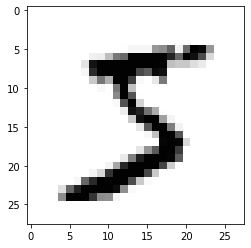

In [2]:
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import layers

from tensorflow.keras import models

import numpy as np

(train_images, train_labels), (test_images, test_labels)	= tf.keras.datasets.mnist.load_data()

print(train_images.shape)
print(train_labels)
print(test_images.shape)


plt.imshow(train_images[0], cmap="Greys")
plt.show()

### Data preprocessing 
- Reshape 
- Normalization
- One-hot encoding 

In [3]:
#

# dataset: train, test

#

train_images = train_images.reshape((60000, 784))

train_images = train_images.astype('float32') / 255.0

 

test_images = test_images.reshape((10000, 784))

test_images = test_images.astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

print(train_images.shape, train_labels.shape)

(60000, 784) (60000, 10)


# 1.Sequential model

In [4]:
#모델 

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',

                loss='mse',

                metrics=['accuracy'])      

Epoch 1/5
469/469 - 1s - loss: 0.0018 - accuracy: 0.9895 - 1s/epoch - 3ms/step
Epoch 2/5
469/469 - 1s - loss: 0.0015 - accuracy: 0.9913 - 1s/epoch - 3ms/step
Epoch 3/5
469/469 - 1s - loss: 0.0012 - accuracy: 0.9930 - 1s/epoch - 3ms/step
Epoch 4/5
469/469 - 1s - loss: 0.0011 - accuracy: 0.9940 - 1s/epoch - 3ms/step
Epoch 5/5
469/469 - 1s - loss: 9.2230e-04 - accuracy: 0.9948 - 1s/epoch - 3ms/step


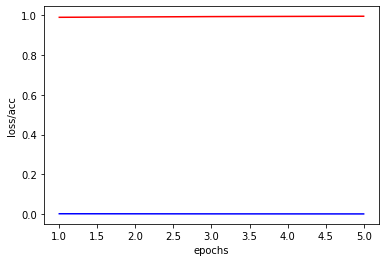

In [6]:
# Training again with history

history = model.fit(train_images, train_labels, epochs=5, batch_size=128,verbose=2)
#training graph
loss = history.history['loss']

acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()

In [ ]:
# test
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('테스트 정확도:', test_acc)

In [ ]:
#test using new data

import cv2 as cv

image = cv.imread('test.png', cv.IMREAD_GRAYSCALE)

image = cv.resize(image, (28, 28))

plt.imshow(image,cmap='Greys')

plt.show()

image = image.astype('float32')

# plt.imshow(image.reshape(28, 28),cmap='Greys')

# plt.show()

image = image.reshape(1, 784)

image = 255-image

image /= 255.0

pred = model.predict(image.reshape(1, 784), batch_size=1)

print("추정된 숫자=", pred.argmax())

print(np.sum(pred))

## 2.Functional model 

(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)


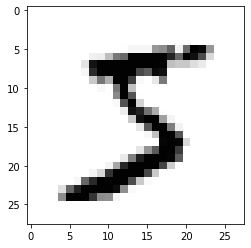

In [3]:
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import layers

from tensorflow.keras import models

import numpy as np

 

(train_images, train_labels), (test_images, test_labels)	= tf.keras.datasets.mnist.load_data()

 

print(train_images.shape)

 

print(train_labels)

print(test_images.shape)

 

plt.imshow(train_images[0], cmap="Greys")

plt.show()

In [4]:
inputs = layers.Input(shape=(784,))

 

x = layers.Dense(512, activation='relu')(inputs)

output = layers.Dense(10, activation='sigmoid')(x) #x값을 10개의 뉴런으로 되어있는 출력값으로 넣는다. 

 

model = models.Model(inputs=inputs, outputs=output) #Model 생성자 함수를 이용해 input은 인풋, 아웃풋 값은 아웃풋에 넣음. 

 

model.compile(optimizer='rmsprop', #최적화 함수 rmsprop 손실 mse 정확도 평가 accuracy

                loss='mse',

                metrics=['accuracy'])           

In [9]:
train_images = train_images.reshape((60000, 784))

train_images = train_images.astype('float32') / 255.0

 

test_images = test_images.reshape((10000, 784))

test_images = test_images.astype('float32') / 255.0

 

train_labels = tf.keras.utils.to_categorical(train_labels)

test_labels = tf.keras.utils.to_categorical(test_labels)

 

# training

#model.fit(train_images, train_labels, epochs=5, batch_size=128)

In [10]:
# Training again with history

history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

loss = history.history['loss']

acc = history.history['accuracy']

epochs = range(1, len(loss)+1) 

 

plt.plot(epochs, loss, 'b', label='Training Loss')

plt.plot(epochs, acc, 'r', label='Accuracy')

plt.xlabel('epochs')

plt.ylabel('loss/acc')

plt.show()


# test

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('테스트 정확도:', test_acc)

Epoch 1/5


ValueError: ignored

## 3. Subclassing model 

(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)


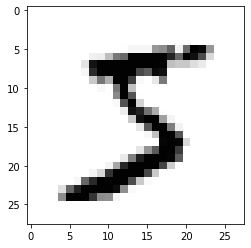

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np

(train_images, train_labels), (test_images, test_labels)	= tf.keras.datasets.mnist.load_data()

print(train_images.shape)

 

print(train_labels)

print(test_images.shape)

plt.imshow(train_images[0], cmap="Greys")

plt.show()
#

# Model3 - Class

#

class MnistMLP(models.Model):


    def __init__(self, num_classes):

        super(MnistMLP, self).__init__(name='mlp')

        self.num_classes = num_classes

        

        self.dense1 = layers.Dense(512, activation='relu')

        self.dense2 = layers.Dense(10, activation='softmax')

        

    def call(self, inputs):

        x = self.dense1(inputs)

        return self.dense2(x)
# model

model = MnistMLP(num_classes=10)

 

model.compile(optimizer='rmsprop',

                loss='mse',

                metrics=['accuracy'])            

In [8]:
 # Training with with history

history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

loss = history.history['loss']

acc = history.history['accuracy']

epochs = range(1, len(loss)+1)

 

plt.plot(epochs, loss, 'b', label='Training Loss')

plt.plot(epochs, acc, 'r', label='Accuracy')

plt.xlabel('epochs')

plt.ylabel('loss/acc')

plt.show()

 

# test

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('테스트 정확도:', test_acc)

Epoch 1/5


InvalidArgumentError: ignored

---
# Hyperparameter search 
- Grid search 
--- 

In [13]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
# import numpy as np 

# import matplotlib.pyplot as plt 

import tensorflow as tf

from sklearn.model_selection import GridSearchCV

# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from scikeras.wrappers import KerasClassifier

# OS warning cure

import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

 

# 데이터 세트 준비

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


train_images = train_images.reshape((60000, 28 * 28))

train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))

test_images = test_images.astype('float32') / 255


train_labels = tf.keras.utils.to_categorical(train_labels)

test_labels = tf.keras.utils.to_categorical(test_labels)

                             

# 신경망 모델 구축

def build_model():

    network = tf.keras.models.Sequential()

    network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

    network.add(tf.keras.layers.Dense(10, activation='sigmoid'))

 

    network.compile(optimizer='rmsprop',

                loss='categorical_crossentropy',

                metrics=['accuracy'])

    return network

# 하이퍼 매개변수 딕셔너리

param_grid = {

              'epochs':[1, 2, 3],	# 에포크 수: 1, 2, 3

              'batch_size':[32, 64, 100]	# 배치 크기: 32, 64, 100

             }

# 케라스 모델을 scikeras에서 사용하도록 포장한다. 

model = KerasClassifier(model = build_model, verbose=1)

 

## Elapsed time start

import time

start = time.time() # 코드가 돌리는 시간을 계산 , 시작할 때 시간 = START  

 

# 그리드 검색

gs = GridSearchCV(

    estimator=model,

    param_grid=param_grid, 

    cv=3, 

    # n_jobs=-1 # comment this line to avoid out-of-memory

)

 

# 그리드 검색 결과 출력

grid_result = gs.fit(train_images, train_labels)

 

## Elapsed time end

end = time.time() #끝날때 시간 

print('Elapsed time:', end - start) # Elapsed time: 122.5, 189.5 #경과시간 

 

print(grid_result.best_score_) # 0.9725, 0.9711

print(grid_result.best_params_) # {'batch_size': 64, 'epochs': 3}

625/625 [==============================] - 1s 1ms/step
Epoch 1/2
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2385 - accuracy: 0.9296
Epoch 2/2
625/625 [==============================] - 1s 1ms/step
Epoch 1/2
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2345 - accuracy: 0.9311
Epoch 2/2
625/625 [==============================] - 1s 2ms/step
Epoch 1/2
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2365 - accuracy: 0.9300
Epoch 2/2
625/625 [==============================] - 1s 1ms/step
Epoch 1/3
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2381 - accuracy: 0.9301
Epoch 2/3
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1022 - accuracy: 0.9700
Epoch 3/3
625/625 [==============================] - 1s 1ms/step
Epoch 1/3
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2323 - accuracy: 0.9314
Epoch 2/3
1250/1250 [==============================] - 3s 3ms/step - loss: 0.10